In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('https://github.com/bipulshahi/Dataset/raw/refs/heads/main/bigmart.xlsx',index_col=0)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,quantity_sold
0,FD,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FD,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,4
4,NC,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18


* Data Quality

  * data types
  * missing values
  * outliers
  * multicollinearity
  * Skewness

In [ ]:
df.shape

(8523, 13)

In [ ]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
df_num = df.select_dtypes(include = 'number')
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,quantity_sold
0,9.30,0.016047,249.8092,1999,3735.1380,14
1,5.92,0.019278,48.2692,2009,443.4228,9
2,17.50,0.016760,141.6180,1999,2097.2700,14
3,19.20,0.000000,182.0950,1998,732.3800,4
4,8.93,0.000000,53.8614,1987,994.7052,18


In [ ]:
df_num = df.select_dtypes(exclude = 'number')
df_num.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,low fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DR,regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FD,low fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FD,regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NC,low fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
(df.isna().sum()/len(df))*100

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,quantity_sold
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,14.932184
std,4.643456,0.051598,62.275067,8.371760,1706.499616,9.211566
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,8.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,14.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,21.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,56.000000


In [ ]:
df.select_dtypes(include='number').corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,quantity_sold
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123,-0.011799
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625,-0.160790
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574,0.011123
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135,-0.074603
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000,0.758565
quantity_sold,-0.011799,-0.160790,0.011123,-0.074603,0.758565,1.000000


<Axes: ylabel='Frequency'>

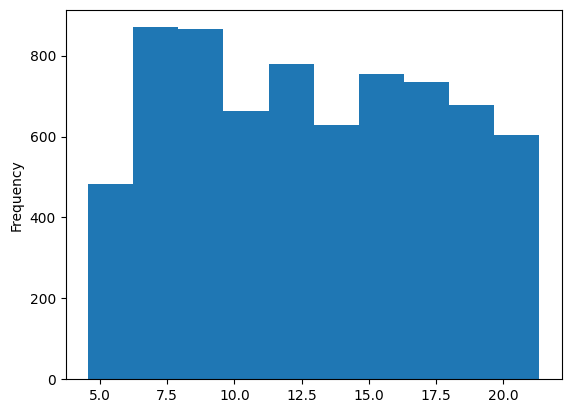

In [ ]:
df['Item_Weight'].plot.hist()

<Axes: ylabel='Frequency'>

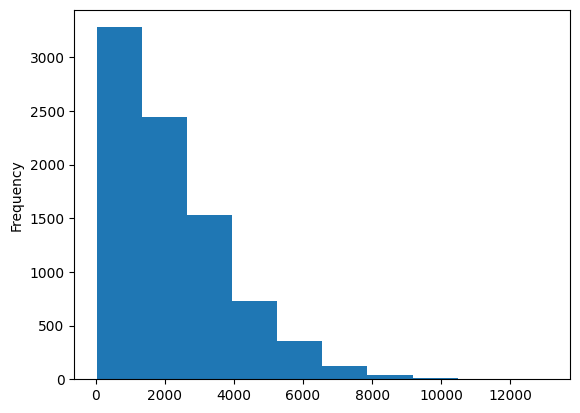

In [ ]:
df['Item_Outlet_Sales'].plot.hist()

*****
*****
**Analyse and preprocess the data**
****
****

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,quantity_sold
0,FD,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FD,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,4
4,NC,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18


In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


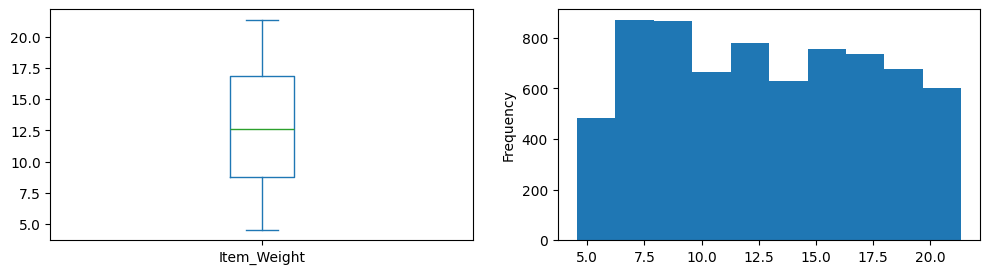

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,3))

plt.subplot(1,2,1)
df['Item_Weight'].plot.box()

plt.subplot(1,2,2)
df['Item_Weight'].plot.hist()

plt.show()

**Analyse box blot**

In [ ]:
q1 = df['Item_Weight'].quantile(0.25)
q2 = df['Item_Weight'].quantile(0.50)
q3 = df['Item_Weight'].quantile(0.75)
print("Quantile 1-" ,q1)
print("Quantile 2-" ,q2)
print("Quantile 3-" ,q3)

Quantile 1- 8.77375
Quantile 2- 12.6
Quantile 3- 16.85


In [ ]:
#Range of most likelihood values

iqr = q3 - q1    #inter quantile range
print(iqr)

8.076250000000002


In [ ]:
upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr
print("Upper fence" , upper_fence)
print("Lower fence" , lower_fence)

Upper fence 28.964375000000004
Lower fence -3.340625000000003


In [ ]:
#minimum value in the weight column within lower fence
df[df['Item_Weight'] > -3.34]['Item_Weight'].min()

4.555

In [ ]:
#maximum value in the weight column within upper fence
df[df['Item_Weight'] < 28.96]['Item_Weight'].max()

21.35

**Analyse Histogram**

In [ ]:
weight_mean = df['Item_Weight'].mean()
print(weight_mean)

12.857645184135976


**measure of dispersion**

  * variance - Measures how far a set of numbers are spread out of their mean
  * standard deviation - Square root of variance

In [ ]:
iw = df['Item_Weight']

variance_iw = ((iw - weight_mean)**2).mean()
print(variance_iw)

21.558634196343665


In [ ]:
std_dev_iw = np.sqrt(variance_iw)
print(std_dev_iw)

4.643127630847946


In [ ]:
#1st standard deviation range

left_hand_1std = weight_mean - std_dev_iw
right_hand_1std = weight_mean + std_dev_iw
print("1st std deviation range-", left_hand_1std, right_hand_1std)

1st std deviation range- 8.21451755328803 17.50077281498392


In [ ]:
((df['Item_Weight'] < 17.50) & (df['Item_Weight'] > 8.21)).sum()/len(df)

np.float64(0.46943564472603544)

In [ ]:
left_hand_2std = weight_mean - 2*std_dev_iw
right_hand_2std = weight_mean + 2*std_dev_iw
print("2nd std deviation range-", left_hand_2std, right_hand_2std)

2nd std deviation range- 3.5713899224400834 22.143900445831868


In [ ]:
left_hand_3std = weight_mean - 3*std_dev_iw
right_hand_3std = weight_mean + 3*std_dev_iw
print("3rd std deviation range-", left_hand_3std, right_hand_3std)

3rd std deviation range- -1.0717377084078628 26.787028076679814


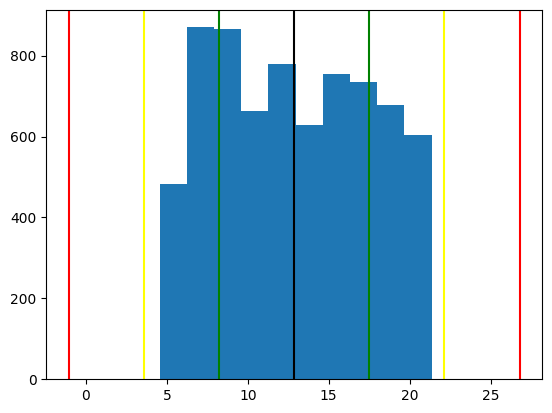

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Item_Weight'])
plt.axvline(x=weight_mean , c='black')

plt.axvline(x=8.21 , c='green')
plt.axvline(x=17.50 , c='green')

plt.axvline(x=3.57 , c='yellow')
plt.axvline(x=22.14 , c='yellow')

plt.axvline(x=-1.07 , c='red')
plt.axvline(x=26.79 , c='red')

plt.show()

In [ ]:
print(df['Item_Weight'].mean())
print(df['Item_Weight'].median())

12.857645184135976
12.6


In [ ]:
#bivariate analysis => one categorical & one continous
#Average weights of 'FD' , 'DR' & 'NC'

df.groupby('Item_Identifier')['Item_Weight'].mean()

,Item_Weight
Item_Identifier,
DR,12.072348
FD,12.832186
NC,13.354532


In [ ]:
df.groupby('Item_Fat_Content')['Item_Weight'].mean()

,Item_Weight
Item_Fat_Content,
low fat,12.937387
regular,12.711654


In [ ]:
df.groupby('Item_Type')['Item_Weight'].mean()

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [ ]:
df.groupby('Item_Type')['Item_Weight'].mean()['Meat']

np.float64(12.81734421364985)

In [ ]:
#fill all missing weights with average weight
#df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [ ]:
#fill the missing values with rhe average weight of 'Item_Type' for the sample where values are missing

df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,quantity_sold
0,FD,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FD,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,4
4,NC,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18


In [ ]:
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,quantity_sold
7,FD,NaN,low fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,37
18,DR,NaN,low fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,20
21,FD,NaN,regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,28
23,FD,NaN,low fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,1
29,FD,NaN,regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DR,NaN,low fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490,33
8487,DR,NaN,low fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150,24
8488,NC,NaN,low fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120,14
8490,FD,NaN,regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656,3


In [ ]:
def average_item_weight(item_type):
  return df.groupby('Item_Type')['Item_Weight'].mean()[item_type]

In [ ]:
average_item_weight('Soft Drinks')

np.float64(11.847459893048129)

In [ ]:
#apply a user defined function on a data column - apply()

df['Item_Type'].apply(average_item_weight).head(10)

,Item_Type
0,13.426069
1,11.847460
2,12.817344
3,13.224769
4,13.384736
5,12.277108
6,12.987880
7,12.987880
8,12.867061
9,12.867061


In [ ]:
#fill the missing values with average weight of crossponding item_type

df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Type'].apply(average_item_weight))

In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'quantity_sold'],
      dtype='object')

In [ ]:
pd.crosstab(df['Outlet_Location_Type'] , df['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,0,0,930
Tier 3,932,1863,0


In [ ]:
df['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


In [ ]:
pd.crosstab(df['Outlet_Type'] , df['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,528
Supermarket Type1,932,930,1860
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


In [ ]:
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [ ]:
#We can use outlet location type information to fill missing values in Outlet size column
#In Tier 1 majority of outlet size are 'Small' and in Tier 2 all outlet size are 'Small', So in these two we can use 'Small' to fill missing values
#In Tier 3 all outlet size are 'Small', so we can use it to fill missing values

def fix_outlet_size(outlet_location_type):
  if outlet_location_type in ['Tier 1' , 'Tier 2']:
    return 'Small'
  else:
    return 'Medium'

In [ ]:
fix_outlet_size('Tier 3')

'Medium'

In [ ]:
#apply() - it is a inbuilt function to apply auser defined function on a data column

df['Outlet_Location_Type'].apply(fix_outlet_size)

,Outlet_Location_Type
0,Small
1,Medium
2,Small
3,Medium
4,Medium
...,...
8518,Medium
8519,Small
8520,Small
8521,Medium


In [ ]:
df['Outlet_Size'] =df['Outlet_Size'].fillna(df['Outlet_Location_Type'].apply(fix_outlet_size))

In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,quantity_sold
0,FD,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FD,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,4
4,NC,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18


In [ ]:
item_types_avg_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].agg(['mean']).sort_values(by='mean' , ascending=False)
item_types_avg_sales

,mean
Item_Type,
Starchy Foods,2374.332773
Seafood,2326.065928
Fruits and Vegetables,2289.009592
Snack Foods,2277.321739
Household,2258.784300
Dairy,2232.542597
Canned,2225.194904
Breads,2204.132226
Meat,2158.977911


In [ ]:
#item_types_avg_sales.plot.bar()

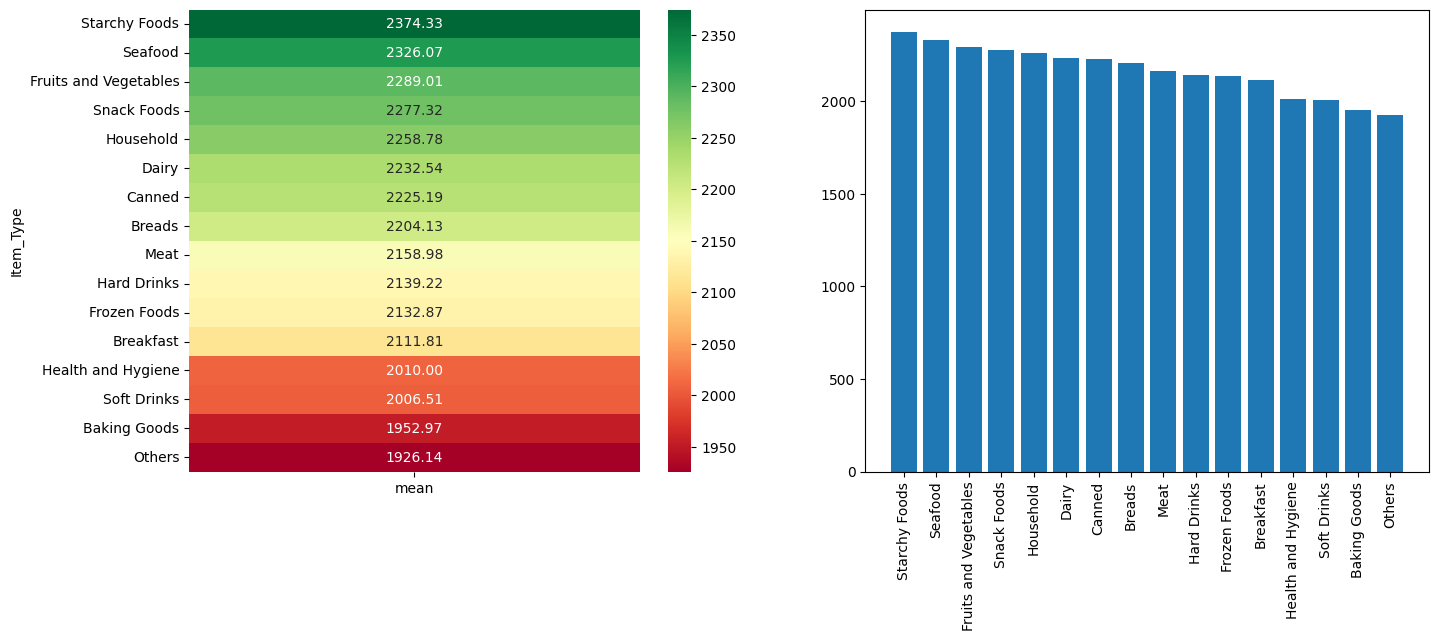

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.heatmap(item_types_avg_sales , annot=True , fmt='.2f' , cmap = 'RdYlGn')

plt.subplot(1,2,2)
plt.bar(x=item_types_avg_sales.index , height=item_types_avg_sales['mean'])
plt.xticks(rotation=90)

plt.show()

In [ ]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [ ]:
#counts of each outlet identifier
df['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT035,930
OUT049,930
OUT046,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [ ]:
#sales in each outlet identifier
df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].agg(['mean'])

,mean
Outlet_Identifier,
OUT010,339.351662
OUT013,2298.995256
OUT017,2340.675263
OUT018,1995.498739
OUT019,340.329723
OUT027,3694.038558
OUT035,2438.841866
OUT045,2192.384798
OUT046,2277.844267


<Axes: xlabel='Outlet_Identifier'>

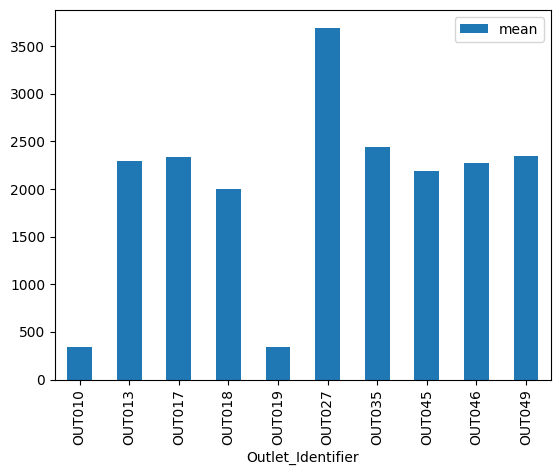

In [ ]:
df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].agg(['mean']).plot.bar()

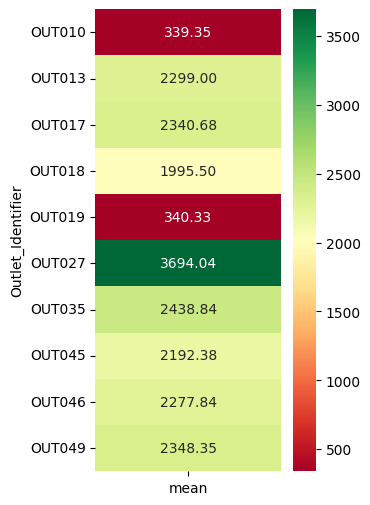

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (3,6))

sns.heatmap(df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].agg(['mean']) , annot=True , fmt='.2f' , cmap = 'RdYlGn')

plt.show()

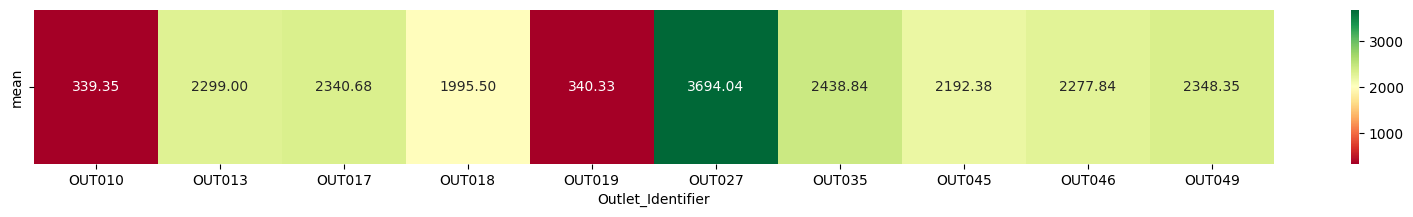

In [ ]:
plt.figure(figsize=(20,2))
sns.heatmap(df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].agg(['mean']).T,
            annot=True , fmt='.2f' , cmap = 'RdYlGn')
plt.show()

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,quantity_sold
0,FD,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FD,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,4
4,NC,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18


In [ ]:
text = 'Python is a fun language'

print(text[2:])

print(text[2:2+6])
print()

print(text[-3])
print(text[-3:])

thon is a fun language
thon i

a
age


In [ ]:
text = 'OUT049'
print(text[4:])
print(text[-2:])

49
49


In [ ]:
#to apply a logic on eavh data sample - we can create suitable user defined function - use apply() to apply on each data sample

def fix_outlet_identifier(identifier):
  return int(identifier[-2:])

fix_outlet_identifier('OUT013')

13

In [ ]:
fix_outlet_identifier('OUTwsedfghjslakjh013')

13

In [ ]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].apply(fix_outlet_identifier)

In [ ]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,quantity_sold
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FD,17.50,low fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10,1998,Medium,Tier 3,Grocery Store,732.3800,4
4,NC,8.93,low fat,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052,18


In [ ]:
df['Outlet_Establishment_Year'].value_counts()

,count
Outlet_Establishment_Year,
1985,1463
1987,932
1999,930
1997,930
2004,930
2002,929
2009,928
2007,926
1998,555


In [ ]:
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].agg(['mean']).sort_values('mean' , ascending=False)

,mean
Outlet_Establishment_Year,
1985,2483.677474
2004,2438.841866
1999,2348.354635
2007,2340.675263
1987,2298.995256
1997,2277.844267
2002,2192.384798
2009,1995.498739
1998,339.351662


In [ ]:
#Multivariate
#Outlet_Establishment_Year , Outlet_Location_Type , Item_Outlet_Sales

#pd.crosstab(df['Outlet_Establishment_Year'] , df['Outlet_Location_Type'])

In [ ]:
df.groupby(['Outlet_Establishment_Year','Outlet_Location_Type'])['Item_Outlet_Sales'].mean().unstack().fillna(0)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Establishment_Year,,,
1985,340.329723,0.000000,3694.038558
1987,0.000000,0.000000,2298.995256
1997,2277.844267,0.000000,0.000000
1998,0.000000,0.000000,339.351662
1999,2348.354635,0.000000,0.000000
2002,0.000000,2192.384798,0.000000
2004,0.000000,2438.841866,0.000000
2007,0.000000,2340.675263,0.000000
2009,0.000000,0.000000,1995.498739


<Axes: xlabel='Outlet_Location_Type', ylabel='Outlet_Establishment_Year'>

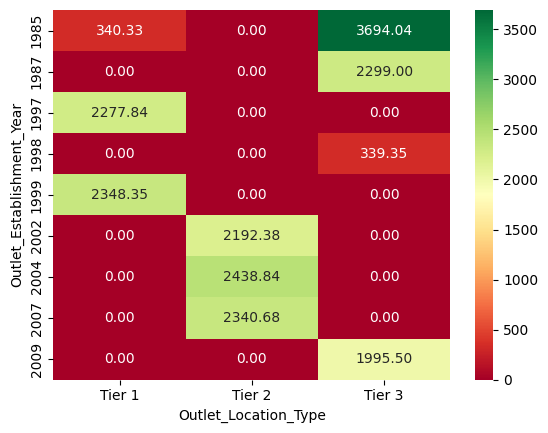

In [ ]:
sns.heatmap(df.groupby(['Outlet_Establishment_Year','Outlet_Location_Type'])['Item_Outlet_Sales'].mean().unstack().fillna(0),
            annot=True, fmt='.2f' , cmap = 'RdYlGn')

In [ ]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,quantity_sold
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228,9


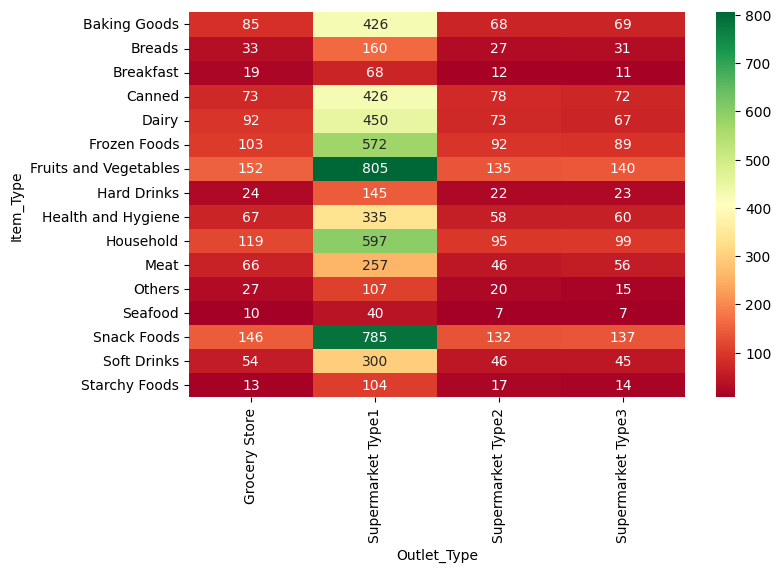

In [ ]:
#Item_Type , Outlet_Type , Item_Outlet_Sales
plt.figure(figsize = (8,5))

sns.heatmap(pd.crosstab(df['Item_Type'] , df['Outlet_Type']) , annot =True , fmt='.0f' , cmap='RdYlGn')

plt.show()

In [ ]:
df.groupby(['Outlet_Type' , 'Item_Type'])['Item_Outlet_Sales'].mean()

Outlet_Type        Item_Type    
Grocery Store      Baking Goods      292.082544
                   Breads            381.967442
                   Breakfast         412.831042
                   Canned            352.864879
                   Dairy             341.866589
                                       ...     
Supermarket Type3  Others           2700.928667
                   Seafood          2687.073686
                   Snack Foods      3745.168739
                   Soft Drinks      3284.938836
                   Starchy Foods    3512.190114
Name: Item_Outlet_Sales, Length: 64, dtype: float64

In [ ]:
df.groupby(['Outlet_Type' , 'Item_Type'])['Item_Outlet_Sales'].mean().unstack().round(2)

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Outlet_Type,,,,,,,,,,,,,,,,
Grocery Store,292.08,381.97,412.83,352.86,341.87,322.29,319.75,243.16,365.90,367.29,387.53,288.09,228.44,353.40,343.60,300.12
Supermarket Type1,2102.02,2346.93,2228.33,2348.73,2392.65,2259.91,2399.95,2231.41,2127.63,2407.40,2260.88,2244.42,2640.20,2406.86,2126.75,2550.17
Supermarket Type2,1780.37,2022.40,1874.67,1867.71,2083.98,1995.64,1951.64,2247.53,1876.65,2065.97,2057.73,1853.62,3166.64,2111.47,1923.81,1947.70
Supermarket Type3,3248.87,3565.12,4584.76,3779.87,3915.18,3553.62,4114.49,3432.95,3318.07,3821.21,3862.29,2700.93,2687.07,3745.17,3284.94,3512.19


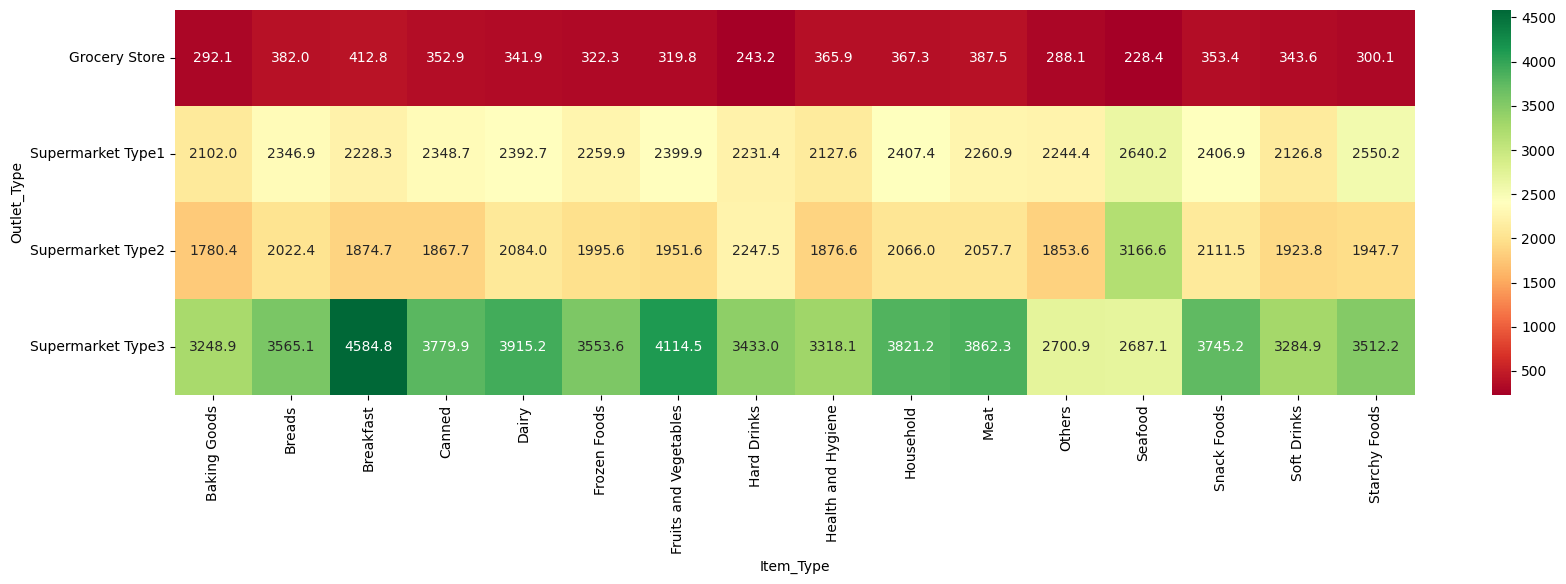

In [ ]:
plt.figure(figsize = (20,5))

sns.heatmap(df.groupby(['Outlet_Type' , 'Item_Type'])['Item_Outlet_Sales'].mean().unstack(),
            annot =True , fmt='.1f' , cmap='RdYlGn')

plt.show()

In [ ]:
#Outlet_Size, 	Outlet_Location_Type, quantity_sold

df.groupby(['Outlet_Size' , 'Outlet_Location_Type'])['quantity_sold'].sum()

Outlet_Size  Outlet_Location_Type
High         Tier 3                  14455
Medium       Tier 1                  14994
             Tier 3                  37887
Small        Tier 1                  15621
             Tier 2                  44310
Name: quantity_sold, dtype: int64

In [ ]:
df.groupby(['Outlet_Size' , 'Outlet_Location_Type'])['quantity_sold'].sum().unstack().fillna(0).astype(int)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,14455
Medium,14994,0,37887
Small,15621,44310,0


In [ ]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,quantity_sold
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FD,17.50,low fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14


In [ ]:
#df['Item_Outlet_Sales'] / df['quantity_sold']

In [ ]:
outlet_age = 2025 - df['Outlet_Establishment_Year']
outlet_age

,Outlet_Establishment_Year
0,26
1,16
2,26
3,27
4,38
...,...
8518,38
8519,23
8520,21
8521,16


In [ ]:
df1 = df.copy()

In [ ]:
df1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,quantity_sold
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228,9


In [ ]:
df1.insert(7 , "Outlet_Age" , outlet_age)

In [ ]:
df1.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,quantity_sold
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,26,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,16,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FD,17.50,low fat,0.016760,Meat,141.6180,49,26,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10,27,1998,Medium,Tier 3,Grocery Store,732.3800,4


In [ ]:
df1 = df1.drop(columns = ['Outlet_Establishment_Year'])
df1.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,quantity_sold
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,26,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,16,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FD,17.50,low fat,0.016760,Meat,141.6180,49,26,Medium,Tier 1,Supermarket Type1,2097.2700,14


**Machine Learning**

  * Supervised Learning
  * UnSupervised Learning
  * Reinforcement Learning

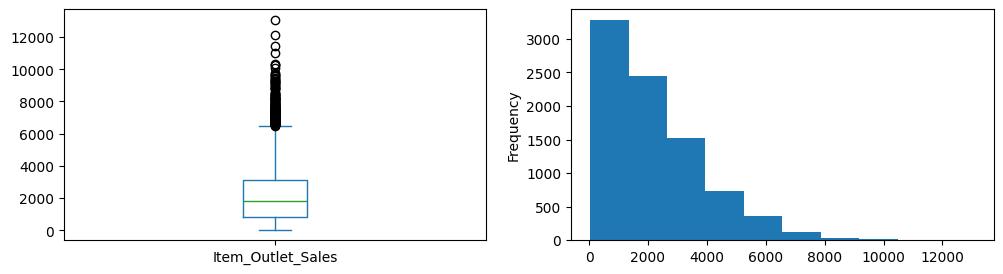

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,3))

plt.subplot(1,2,1)
df['Item_Outlet_Sales'].plot.box()

plt.subplot(1,2,2)
df['Item_Outlet_Sales'].plot.hist()

plt.show()